<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/utils/gaussian_quadrature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
from sympy import *

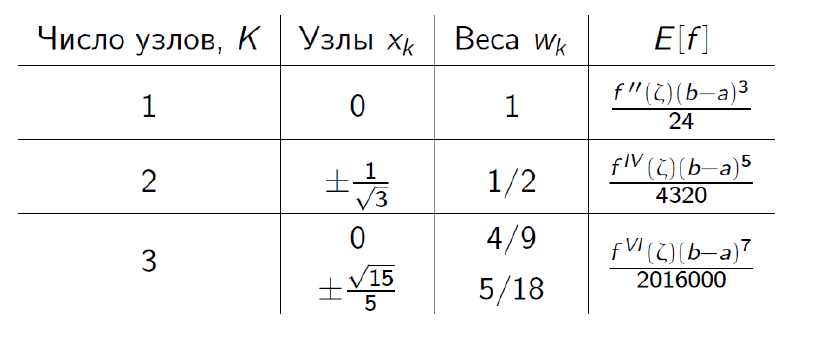

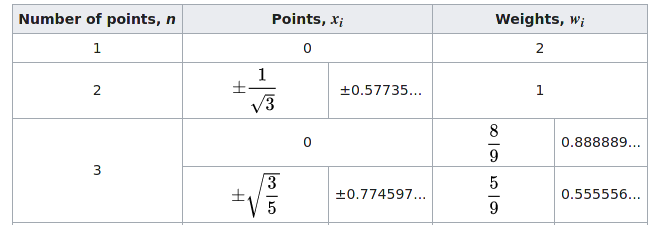

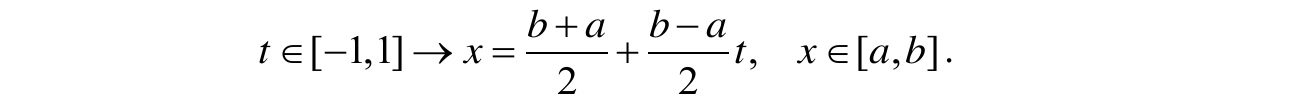

In [2]:
def shiftPoint(t, a, b):
    return ((b+a)/2) + ((b-a)/2)*t

def getUniformPoints(N):
    if N == 1:
        return [0]
    elif N == 2:
        return [-1/math.sqrt(3), 1/math.sqrt(3)]
    elif N == 3:
        return [-1/math.sqrt(5), 0, 1/math.sqrt(5)]

def getPoints(N, a=-1, b=1):
    return [shiftPoint(z, a, b) for z in getUniformPoints(N)]

In [3]:
def shiftWeight(w, a, b):
    return w*(b+a)/2

def getUniformWeights(N):
    if N == 1:
        return [2]
    elif N == 2:
        return [1, 1]
    elif N == 3:
        return [10/18, 16/9, 10/18]

def getWeights(N, a=-1, b=1):
    return [shiftWeight(w, a, b) for w in getUniformWeights(N)]

In [4]:
# 2 points
def getMaxError(N, f, a, b):
    d4f = f.diff(x, 4)
    M = max([abs(d4f.subs(x, z).evalf()) for z in np.linspace(a, b, 1000)])
    return M * ((b-a)**5) / 4320

def evaluate(f, points, weights):
    I = 0
    for z, w in zip(points, weights):
        I += w * f.subs(x, z)
    return I

In [5]:
x = symbols('x')
f = sin(x**2)
a = 0
b = 1
N = 2
Integral(f, (x, a, b))

Integral(sin(x**2), (x, 0, 1))

In [6]:
evaluate(f, getPoints(N, a, b), getWeights(N, a, b))

0.313655996227643

In [7]:
getMaxError(N, f, a, b)

0.00658067234578900

In [8]:
print('Actual value:', Integral(f, (x, a, b)).evalf())

Actual value: 0.310268301723381
